In [1]:
#undestanding the difference between Python and Pandas date tools
import datetime
date=datetime.date(year=2013,month=6,day=7)
time=datetime.time(hour=12,minute=30,second=19,microsecond=463198)
df=datetime.datetime(year=2013,month=6,day=7,hour=12,minute=30,second=19,microsecond=463198)

print(date)
print(time)
print(df)

td=datetime.timedelta(weeks=2,days=5,hours=10,minutes=20,seconds=6.73,milliseconds=99,microseconds=8)
print(td)

print(date+td)
print(df+td)

#
import pandas as pd
pd.Timestamp(year=2012,month=12,day=21,hour=5,minute=10,second=8,microsecond=99)
pd.Timestamp('2016/1/12')

pd.Timestamp(5000,unit='D') #1/1/1970

pd.to_datetime('2015-5-13')
pd.to_datetime('2015-13-5',dayfirst=True)
#pd.to_datetime('Start Date: Sep 30, 2017 Start Time:1:30 pm',
#              format='Start Date: %b %d, %Y Start Time: %I:%M %p')
pd.to_datetime(100,unit='D',origin='2013-1-1')

s=pd.Series([10,100,1000,10000])
pd.to_datetime(s,unit='D')

f=pd.Series(['12-5-2015','14-1-2013','20/12/2017','40/23/2017'])
pd.to_datetime(f,dayfirst=True,errors='coerce')
pd.to_datetime(['Aug 3 1999 3:45:56','10/31/2017'])

pd.Timedelta(days=5,minutes=7.34)
pd.Timedelta(100,unit='W')

s=pd.Series([10,100])
pd.to_timedelta(s,unit='s')

#Timedeltas may be added or subtracted from Timestamps and from each other.
pd.Timedelta('12 days 5 hours 3 minutes')*2

td1=pd.to_timedelta([10,100],unit='s')
td2=pd.to_timedelta(['3 hours','4 hours'])
td1+td2

ts=pd.Timestamp('2016-10-1 4:23:23.9')
print(ts.ceil('h'))
print(ts.year)
print(ts.month)
print(ts.day)
print(ts.hour)
print(ts.dayofweek)
print(ts.daysinmonth)
print(ts.dayofyear)

t_d=pd.Timestamp(125.8723,unit='h')
print(t_d)
print(t_d.round('min'))

2013-06-07
12:30:19.463198
2013-06-07 12:30:19.463198
19 days, 10:20:06.829008
2013-06-26
2013-06-26 22:50:26.292206
2016-10-01 05:00:00
2016
10
1
4
5
31
275
1970-01-06 05:52:20.280000
1970-01-06 05:52:00


In [16]:
#Slicing time series intelligently
import pandas as pd
crime=pd.read_hdf('data/crime.h5','crime')
crime.dtypes
crime=crime.set_index('REPORTED_DATE')
crime.sort_index()
#crime.loc['2012-01-02 00:06:00']
crime.loc['2012-01-02'] #用datetime做index的好处，只输入date得出所有那天任何时间的records
#crime.loc['2016-05'].shape  crime.loc['2016']
crime.loc['Dec 2015'].sort_index()
crime.loc['2015-3-1':'2015-10-1'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-01 00:09:00,robbery-residence,robbery,-104.956960,39.758409,skyland,1,0
2015-03-01 00:40:00,theft-of-motor-vehicle,auto-theft,-104.858895,39.658884,kennedy,1,0
2015-03-01 00:44:00,assault-simple,other-crimes-against-persons,-104.890551,39.740155,east-colfax,1,0
2015-03-01 01:08:00,assault-simple,other-crimes-against-persons,-104.974901,39.670054,rosedale,1,0
2015-03-01 01:12:00,drug-poss-paraphernalia,drug-alcohol,-104.887845,39.738856,east-colfax,1,0
2015-03-01 01:14:00,theft-from-bldg,larceny,-104.896505,39.718945,lowry-field,1,0
2015-03-01 01:21:00,traf-other,all-other-crimes,-104.993151,39.757849,five-points,1,0
2015-03-01 01:22:00,traf-other,all-other-crimes,-104.990009,39.711171,baker,1,0
2015-03-01 01:22:00,traf-other,all-other-crimes,-104.990855,39.678341,overland,1,0


In [29]:
#Using methods that only work with a DatatimeIndex
import pandas as pd
crime=pd.read_hdf('data/crime.h5','crime').set_index('REPORTED_DATE')
print(type(crime.index))
crime.between_time('2:00','5:00',include_end=False).head()
crime.at_time('5:47').head()

#the first methods provide an elegant way of selectiong the first n segments of time
#the DataFram must be sorted on its index in order to make it work
crime_sort=crime.sort_index()
crime_sort.first(pd.offsets.MonthBegin(5))
crime_sort.first(pd.offsets.MonthEnd(1))

crime_sort.loc[:'2012-06']
crime_sort.first('5D') # 5 days
crime_sort.first('5B') # 5 Business Days
crime_sort.first('7W') # 7 Weeks edning on Sunday

dt=pd.Timestamp('2012-1-16 12:40')
dt+pd.DateOffset(months=1) #加一个月


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Timestamp('2012-02-16 12:40:00')

['agg', 'aggregate', 'apply', 'asfreq', 'ax', 'backfill', 'bfill', 'count', 'ffill', 'fillna', 'first', 'get_group', 'groups', 'indices', 'interpolate', 'last', 'max', 'mean', 'median', 'min', 'ndim', 'nearest', 'ngroups', 'nunique', 'obj', 'ohlc', 'pad', 'pipe', 'plot', 'prod', 'sem', 'size', 'std', 'sum', 'transform', 'var']


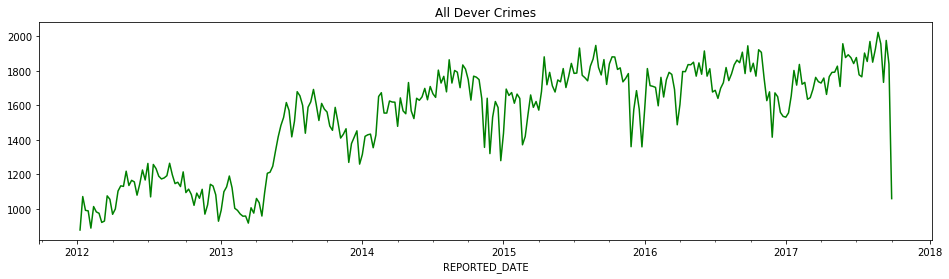

In [54]:
#Couting the number of weekly crimes
import pandas as pd
import matplotlib.pyplot as plt
crime_sort=pd.read_hdf('data/crime.h5','crime').set_index('REPORTED_DATE').sort_index()
weekly_crime=crime_sort.resample('W').size() 
#weekly_crime=crime_sort.resample('W-THU').size() #用周二作为一周的最后一天
weekly_crime.head() #len(crime_sort.loc[:'2012-1-8'])
weekly_crime_v1=crime_sort.groupby(pd.Grouper(freq='W')).size()
weekly_crime_v1

#all possible method in resample
r=crime_sort.resample('W')
resample_methods=[attr for attr in dir(r) if attr[0].islower()]
print(resample_methods)


#more
crime=pd.read_hdf('data/crime.h5','crime')
weekly_crime2=crime.resample('W',on='REPORTED_DATE').size() 
#weekly_crime2=crime.groupby(pd.Grouper(key='REPORTED_DATE',freq='W')).size()
weekly_crime2.plot(figsize=(16,4),title='All Dever Crimes',color='green')

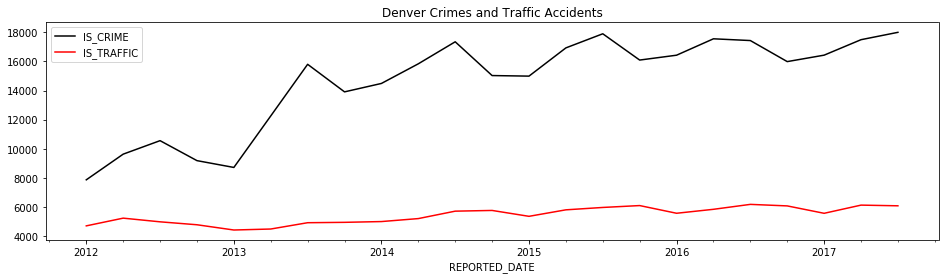

In [69]:
#Aggreate weekly crime and traffic accidents seperately
import pandas as pd
import matplotlib.pyplot as plt
crime_sort=pd.read_hdf('data/crime.h5','crime').set_index('REPORTED_DATE').sort_index()
quarterly_crime=crime_sort.resample('Q')['IS_CRIME','IS_TRAFFIC'].sum() #时间为每个季度的最后一天
#quarterly_crime1=crime_sort.resample('QS',on='REPORTED_DATE')['IS_CRIME','IS_TRAFFIC'].sum() #时间为每个季度的第一天
#quarterly_crime1
plot_kwargs=dict(figsize=(16,4),color=['black','red'],title='Denver Crimes and Traffic Accidents')
quarterly_crime.plot(**plot_kwargs)



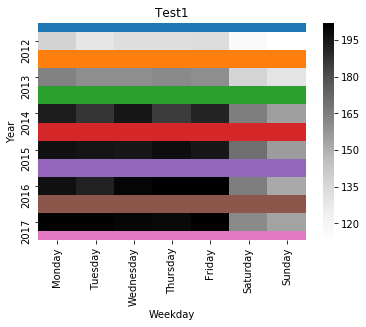

In [50]:
#Measuring crime by weekday and year
import pandas as pd
import matplotlib.pyplot as plt
crime=pd.read_hdf('data/crime.h5','crime')
crime.head()

#All Timestamp columns have a special attribute called dt accessor
wd_counts=crime['REPORTED_DATE'].dt.weekday_name.value_counts()
wd_counts
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
wd_counts.reindex(days).plot(kind='barh',title='Test')
crime['REPORTED_DATE'].dt.year.value_counts().sort_index().plot(kind='barh',title='Test1')

#Group by both weekday and year
weekday_name=crime['REPORTED_DATE'].dt.weekday_name
year=crime['REPORTED_DATE'].dt.year

crime_wd_y=crime.groupby([year,weekday_name]).size()
crime_table=crime_wd_y.rename_axis(['Year','Weekday']).unstack('Weekday')

#2017 number is not incomplete, we cam make a simple linear extrapilation to estimate
criteria=crime['REPORTED_DATE'].dt.year==2017
criteria
crime.loc[criteria,'REPORTED_DATE'].dt.dayofyear.max()

round(272/365,3)
year=crime['REPORTED_DATE'].dt.year
#看下历史数据中前272天crime占的比例
crime_pct=crime['REPORTED_DATE'].dt.dayofyear.le(272).groupby(year).mean().round(3)  #le(272) means less than 272
number=crime_pct.loc[2012:2016].median()
crime_table.loc[2017]=crime_table.loc[2017].div(number).astype('int')
crime_table=crime_table.reindex(columns=days)
crime_table

#heatmap
import seaborn as sns
#sns.heatmap(crime_table,cmap='Greys')

#we may consider the population into our analysis
dever_pop=pd.read_csv('data/denver_pop.csv',index_col='Year')
dever_pop

#many crime metrics are reported as rates per 100,000 residents
den_100k=dever_pop.div(10000).squeeze(axis=1)
#squeeze 函数：从数组的形状中删除单维度条目，即把shape中为1的维度去掉
#用法：numpy.squeeze(a,axis = None)

crime_table2=crime_table.div(den_100k,axis=0).astype('int')
sns.heatmap(crime_table2,cmap='Greys')

REPORTED_DATE,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,95,72,72,76,71,78,76
2013,85,74,74,69,65,68,67
2014,94,76,72,70,76,67,67
2015,108,102,89,101,92,85,78
2016,119,102,100,99,97,86,85
2017,114,118,111,106,111,91,102


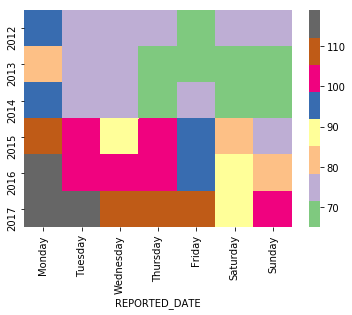

In [59]:
#Write a fucnction to apply to all crime type
import pandas as pd
import numpy as np
import seaborn as sns

crime=pd.read_hdf('data/crime.h5','crime')
Adjust_2017=.748
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

def count_crime(df,crime_type):
    df=df[df['OFFENSE_CATEGORY_ID']==crime_type]
    weekday=df['REPORTED_DATE'].dt.weekday_name
    yaer=df['REPORTED_DATE'].dt.year
    
    ct=df.groupby([year,weekday]).size().unstack()
    ct.loc[2017]=ct.loc[2017].div(Adjust_2017).astype('int')
    
    pop=pd.read_csv('data/denver_pop.csv',index_col='Year')
    pop=pop.squeeze().div(100000)
    
    ct=ct.div(pop,axis=0).astype('int')
    ct=ct.reindex(columns=days)
    sns.heatmap(ct,cmap='Accent')
    return ct

count_crime(crime,'auto-theft')

In [28]:
#Grouping with anonymous function with a datetimeindex
import pandas as pd
crime_sort=pd.read_hdf('data/crime.h5','crime').set_index('REPORTED_DATE').sort_index()

common_attrs=set(dir(crime_sort.index))&set(dir(pd.Timestamp))
print([attr for attr in common_attrs if attr[0]!='_'])

crime_sort.index.weekday_name.value_counts()

crime_sort.groupby(lambda x: x.weekday_name)['IS_CRIME','IS_TRAFFIC'].sum()

func=[lambda x:x.round('2h').hour, lambda x:x.year]
cr_final=crime_sort.groupby(func)['IS_CRIME','IS_TRAFFIC'].sum().unstack(-1)
cr_final.style.highlight_max(color='red')

#cr_final is a DF with Multiindex columns, the xs allow you to select a single value from any index level
cr_final.xs('IS_TRAFFIC',axis='columns',level=0)
cr_final.xs(2016,axis='columns',level=-1)

['is_leap_year', 'date', 'is_month_end', 'tz', 'is_year_start', 'is_year_end', 'is_quarter_end', 'to_period', 'week', 'round', 'max', 'normalize', 'freqstr', 'is_month_start', 'minute', 'weekday', 'year', 'min', 'weekday_name', 'is_quarter_start', 'freq', 'month', 'tzinfo', 'dayofyear', 'day', 'weekofyear', 'microsecond', 'resolution', 'daysinmonth', 'hour', 'second', 'ceil', 'to_pydatetime', 'tz_convert', 'quarter', 'strftime', 'nanosecond', 'month_name', 'days_in_month', 'floor', 'dayofweek', 'tz_localize', 'to_julian_date', 'day_name', 'time']


,IS_CRIME,IS_TRAFFIC
0,5377,980
2,4091,718
4,3044,464
6,2108,593
8,4488,2372
10,6218,2303
12,7226,2760
14,6896,2763
16,7926,3527
18,7407,3608


In [54]:
#Group by a Timestamp and another column
import pandas as pd
employee=pd.read_csv('data/employee.csv',parse_dates=['JOB_DATE','HIRE_DATE'],index_col='HIRE_DATE')
employee.head()
employee.groupby('GENDER')['BASE_SALARY'].mean().round(0)
employee.resample('10AS')['BASE_SALARY'].mean()

#group by both gender and a 5 year time span
employee.groupby('GENDER').resample('10AS')['BASE_SALARY'].mean().unstack(0)

employee[employee['GENDER']=='Male'].index.min() #min Male start date
employee[employee['GENDER']=='Female'].index.min() #min Male start date

employee.groupby(['GENDER',pd.Grouper(freq='10AS')])['BASE_SALARY'].mean().unstack('GENDER')

#you can use cut function with a equal_width intervals based on the year that
cuts=pd.cut(employee.index.year, bins=5, precision=0)
cuts.categories.values

employee.groupby([cuts,'GENDER'])['BASE_SALARY'].mean().unstack(-1)

GENDER,Female,Male
"(1958.0, 1970.0]",NaN,85414.500000
"(1970.0, 1981.0]",54350.250000,72688.818182
"(1981.0, 1993.0]",55661.626506,69333.305000
"(1993.0, 2004.0]",56513.856250,62266.883495
"(2004.0, 2016.0]",49092.631902,49829.320242


In [77]:
#finding the last tiem crime was 20% lower with merge_asof
import pandas as pd
crime_sort=pd.read_hdf('data/crime.h5','crime').set_index('REPORTED_DATE').sort_index()

#find the last full month of date
crime_sort.index.max()

#since we don't have full Sep data, so we drop it from our dataset
crime_sort=crime_sort.loc[:'2017-8']

all_data=crime_sort.groupby([pd.Grouper(freq='M'),'OFFENSE_CATEGORY_ID']).size()
all_data.head()
all_data=all_data.sort_values().reset_index(name='Total')

goal=all_data[all_data['REPORTED_DATE']=='2017-8-31'].reset_index(drop=True)
goal['Total_Goal']=goal['Total'].mul(.8).astype(int) #mul(.8) = muliple * 0.8

#Now use the merge_asof function to find the last time a monthly crime total was less than 
#the column Total_Goal for each offense category
pd.merge_asof(goal,all_data,left_on='Total_Goal',right_on='Total',by='OFFENSE_CATEGORY_ID',\
             suffixes=('_Current','_Last'))

goal

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total,Total_Goal
0,2017-08-31,murder,7,5
1,2017-08-31,arson,7,5
2,2017-08-31,sexual-assault,57,45
3,2017-08-31,robbery,108,86
4,2017-08-31,white-collar-crime,138,110
5,2017-08-31,aggravated-assault,195,156
6,2017-08-31,other-crimes-against-persons,376,300
7,2017-08-31,burglary,432,345
8,2017-08-31,auto-theft,599,479
9,2017-08-31,drug-alcohol,636,508


In [88]:
#More about to_period
import pandas
crime_sort=pd.read_hdf('data/crime.h5','crime').set_index('REPORTED_DATE').sort_index()

ad_period=crime_sort.groupby([lambda x: x.to_period('M'),'OFFENSE_CATEGORY_ID']).size()
ad_period=ad_period.sort_values().reset_index(name='Total').rename(columns={'level_0':'REPORTED_DATE'})

all_data=crime_sort.groupby([pd.Grouper(freq='M'),'OFFENSE_CATEGORY_ID']).size()
all_data=all_data.sort_values().reset_index(name='Total')

aug_2018=pd.Period('2017-8',freq='M')

goal_period=ad_period[ad_period['REPORTED_DATE']==aug_2018].reset_index(drop=True)
goal_period['Total_Goal']=goal_period['Total'].mul(0.8).astype(int)

pd.merge_asof(goal_period,ad_period,left_on='Total_Goal',right_on='Total',by='OFFENSE_CATEGORY_ID',\
              suffixes=('_Current','_Last'))

#Perform an asof merge. This is similar to a left-join except that we match on nearest key rather than equal keys.
#Both DataFrames must be sorted by the key.
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.merge_asof.html

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total,Total_Goal
0,2017-08,arson,7,5
1,2017-08,murder,7,5
2,2017-08,sexual-assault,57,45
3,2017-08,robbery,108,86
4,2017-08,white-collar-crime,138,110
5,2017-08,aggravated-assault,195,156
6,2017-08,other-crimes-against-persons,376,300
7,2017-08,burglary,432,345
8,2017-08,auto-theft,599,479
9,2017-08,drug-alcohol,636,508
